In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [13]:
df = pd.read_csv('depression_data.csv') 

In [14]:
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [15]:
df.isnull().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

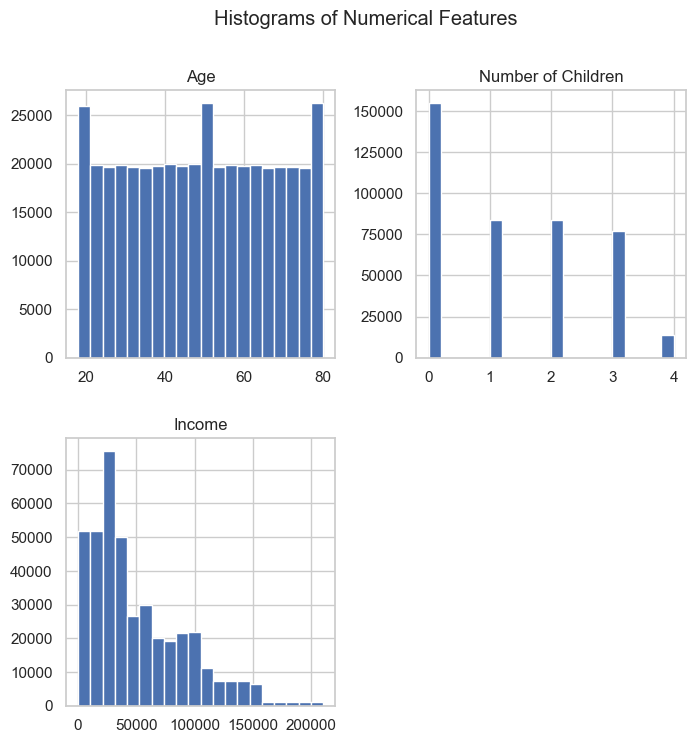

In [16]:
import matplotlib.pyplot as plt
df.hist(figsize=(8, 8), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

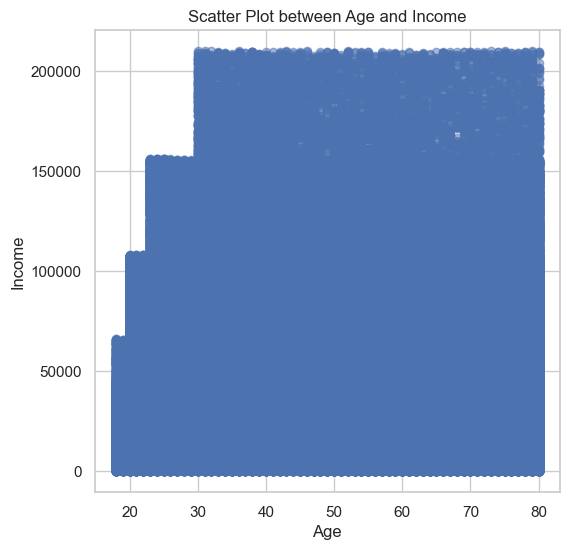

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(df['Age'], df['Income'], alpha=0.5)
plt.title('Scatter Plot between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


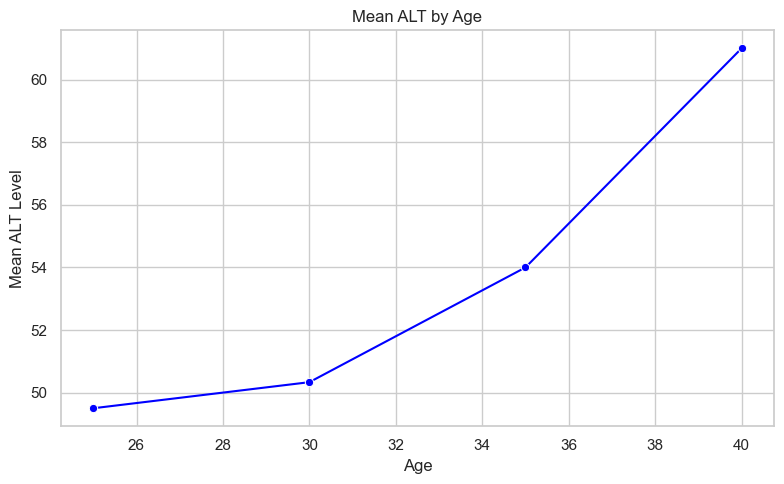

In [18]:
import seaborn as sns
data = {
    'Age': [25, 30, 25, 40, 30, 25, 40, 30, 35, 25],
    'ALT': [45, 50, 55, 60, 52, 48, 62, 49, 54, 50]
}

# Create DataFrame
df = pd.DataFrame(data)

# Group by Age and calculate mean ALT
mean_alt_by_age = df.groupby('Age')['ALT'].mean().reset_index()

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(data=mean_alt_by_age, x='Age', y='ALT', marker='o', color='blue')
plt.title('Mean ALT by Age')
plt.xlabel('Age')
plt.ylabel('Mean ALT Level')
plt.tight_layout()
plt.show()

In [19]:
df["Readmitted_Depression"] = np.where(
    (df["History of Mental Illness"] == "Yes") &
    (df["History of Substance Abuse"] == "Yes") &
    (df["Family History of Depression"] == "Yes") &
    (df["Sleep Patterns"] == "Poor") &
    (df["Dietary Habits"] == "Unhealthy"),
    1, 0
)

KeyError: 'History of Mental Illness'

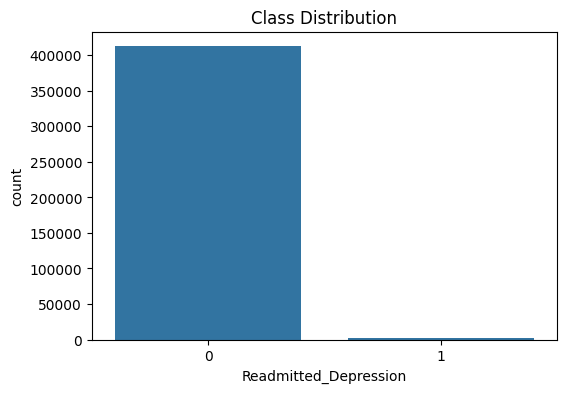

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Readmitted_Depression', data=df)
plt.title('Class Distribution')
plt.show()


In [ ]:
#Encode categorical variables using Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store encoder if inverse transform needed


In [ ]:
#Split into features and target
X = df.drop(columns=['Readmitted_Depression'])
y = df['Readmitted_Depression']

In [ ]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
#Feature scaling (important for distance-based models like KNN, SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train.shape, X_test.shape)


(331014, 16) (82754, 16)


In [ ]:
df['risk_score'] = (
    (df['History of Mental Illness'] == 1).astype(int) +
    (df['History of Substance Abuse'] == 1).astype(int) +
    (df['Family History of Depression'] == 1).astype(int) +
    (df['Sleep Patterns'] == 2).astype(int) +  # Assuming 2 = Poor
    (df['Chronic Medical Conditions'] == 1).astype(int) +
    (df['Employment Status'] == 1).astype(int) +  # Assuming 1 = Unemployed
    (df['Physical Activity Level'] == 2).astype(int)  # Assuming 2 = Sedentary
)

Depression Risk
0    238338
1    175430
Name: count, dtype: int64


In [ ]:
df['Depression Risk'] = (df['risk_score'] >= 2).astype(int)


In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Define X and y again to be safe
X = df.drop(columns=['Depression Risk', 'risk_score'])
y = df['Depression Risk']

# Step 2: Reset index (in case of shuffling or reindex issues)
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Step 3: Stratified split to preserve class ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 4: Confirm class balance
print("Training labels:", y_train.value_counts())
print("Test labels:", y_test.value_counts())


Training labels: Depression Risk
1    235349
0     95665
Name: count, dtype: int64
Test labels: Depression Risk
1    58838
0    23916
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [ ]:
df["Readmitted_Depression"] = np.where(
    (df["History of Mental Illness"] == "Yes") &
    (df["History of Substance Abuse"] == "Yes") &
    (df["Family History of Depression"] == "Yes") &
    (df["Sleep Patterns"] == "Poor") &
    (df["Dietary Habits"] == "Unhealthy"),
    1, 0
)
# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "LinearRegression (binary)": LinearRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naïve Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
}



# Evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    
    if name == "LinearRegression (binary)":
        preds_prob = model.predict(X_test)
        preds = [1 if p >= 0.5 else 0 for p in preds_prob]
        auc = roc_auc_score(y_test, preds_prob)
    else:
        preds = model.predict(X_test)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) if hasattr(model, "predict_proba") else "N/A"
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds),
        "ROC AUC": auc
    })
results_df = pd.DataFrame(results)
print(results_df)

c:\Users\ranaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ranaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ranaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

                       Model  Accuracy  Precision   Recall  F1 Score   ROC AUC
0                        KNN  0.996266   0.000000  0.00000  0.000000  0.500823
1                        SVM  0.996266   0.000000  0.00000  0.000000  0.515911
2  LinearRegression (binary)  0.996266   0.000000  0.00000  0.000000  1.000000
3              Decision Tree  1.000000   1.000000  1.00000  1.000000  1.000000
4                Naïve Bayes  0.996266   0.000000  0.00000  0.000000  0.901693
5        Logistic Regression  0.995867   0.329897  0.10356  0.157635  0.940839


c:\Users\ranaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]

print("KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_proba_knn))


KNN Results:
Accuracy: 0.9965439737051985
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.506296106037824


c:\Users\ranaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)[:, 1]

print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_proba_svm))


SVM Results:
Accuracy: 0.9962660415206516
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.4840887746876853


c:\Users\ranaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_prob_lr = linreg.predict(X_test)
y_pred_lr = [1 if p >= 0.5 else 0 for p in y_pred_prob_lr]

print("Linear Regression (Binary) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob_lr))


Linear Regression (Binary) Results:
Accuracy: 0.9962660415206516
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 1.0


c:\Users\ranaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_proba_dt))


Decision Tree Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_proba_nb = nb.predict_proba(X_test)[:, 1]

print("Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_nb))


Naive Bayes Results:
Accuracy: 0.9962660415206516
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.9016930184504683


c:\Users\ranaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))
print("ROC AUC:", roc_auc_score(y_test, y_proba_logreg))


Logistic Regression Results:
Accuracy: 0.9958672692558668
Precision: 0.32989690721649484
Recall: 0.10355987055016182
F1 Score: 0.15763546798029557
ROC AUC: 0.9408389352831279


c:\Users\ranaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Assuming your data and target are X and y

# 1. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Apply SMOTE to training data ONLY
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# 3. Initialize and train Decision Tree
DT_model = DecisionTreeClassifier(random_state=123)
DT_model.fit(X_train_sm, y_train_sm)

# 4. Predict on test set (which is NOT oversampled)
y_pred = DT_model.predict(X_test)

# 5. Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Decision Tree Model Performance:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Decision Tree Model Performance:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82468
           1       1.00      1.00      1.00       286

    accuracy                           1.00     82754
   macro avg       1.00      1.00      1.00     82754
weighted avg       1.00      1.00      1.00     82754

Confusion Matrix:
[[82468     0]
 [    0   286]]


AUC Score: 1.0000


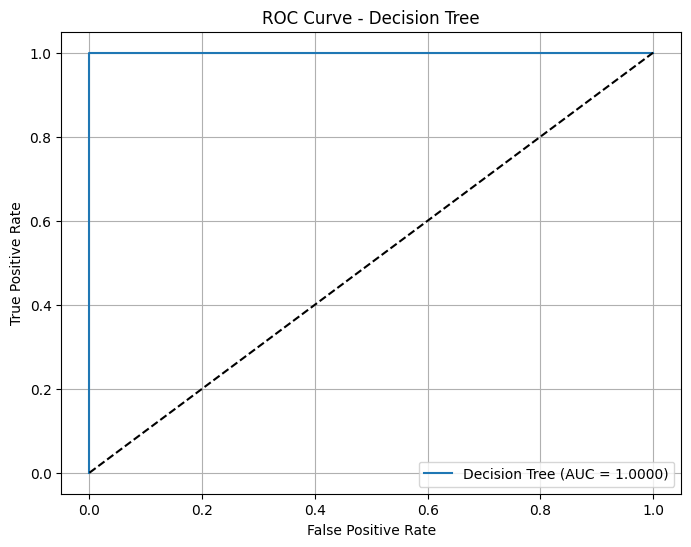

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are already defined

# Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities for the positive class on the test set
y_probs = model.predict_proba(X_test)[:, 1]

# Compute False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC (Area Under Curve)
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc_score:.4f})')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000
AUC Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     82468
           1       1.00      1.00      1.00       286

    accuracy                           1.00     82754
   macro avg       1.00      1.00      1.00     82754
weighted avg       1.00      1.00      1.00     82754



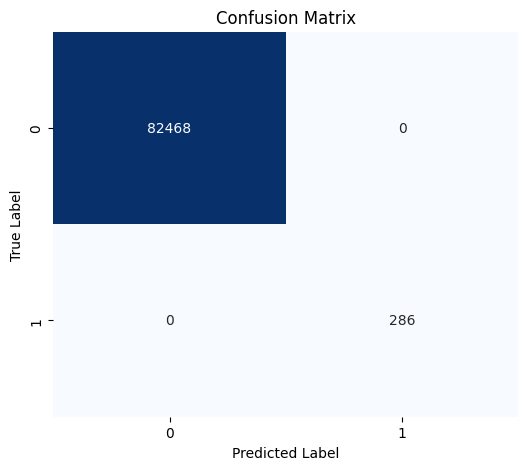

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_probs)

# Print metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC Score: {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
